#### importing the Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the Dataframe

In [2]:
data=pd.read_csv(r"D:\demo_data\1.ushape.csv",header=None)

In [3]:
data.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [4]:
data[[0,1]]

,0,1
0,0.031595,0.986988
1,2.115098,-0.046244
2,0.882490,-0.075756
3,-0.055144,-0.037332
4,0.829545,-0.539321
...,...,...
95,1.699453,0.587720
96,0.218623,-0.652521
97,0.952914,-0.419766
98,-1.318500,0.423112


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

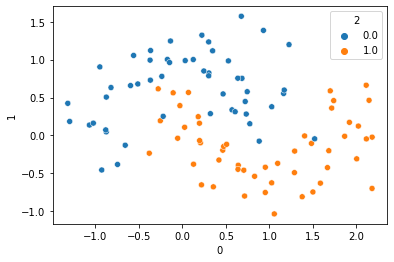

In [5]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1,)

In [7]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [8]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)

In [9]:
model=Sequential()
model.add(Dense(3,activation="relu",kernel_initializer="he_uniform",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [10]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Training the data

In [11]:
history=model.fit(x_trainf,y_train,batch_size=1,epochs=50,validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 1s 4ms/step - loss: 1.3104 - accuracy: 0.5000 - val_loss: 1.4671 - val_accuracy: 0.4444
Epoch 2/50
72/72 [==============================] - 0s 2ms/step - loss: 1.2358 - accuracy: 0.5000 - val_loss: 1.3759 - val_accuracy: 0.4444
Epoch 3/50
72/72 [==============================] - 0s 2ms/step - loss: 1.1659 - accuracy: 0.5139 - val_loss: 1.2959 - val_accuracy: 0.4444
Epoch 4/50
72/72 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.5278 - val_loss: 1.2210 - val_accuracy: 0.4444
Epoch 5/50
72/72 [==============================] - 0s 2ms/step - loss: 1.0471 - accuracy: 0.5278 - val_loss: 1.1494 - val_accuracy: 0.4444
Epoch 6/50
72/72 [==============================] - 0s 2ms/step - loss: 0.9960 - accuracy: 0.5278 - val_loss: 1.0891 - val_accuracy: 0.4444
Epoch 7/50
72/72 [==============================] - 0s 2ms/step - loss: 0.9492 - accuracy: 0.5278 - val_loss: 1.0289 - val_accuracy: 0.4444
Epoch 8/50
72/72 [==

In [12]:
model.get_weights()

[array([[-1.9017153 , -1.1322342 ,  0.48729822],
        [-0.18279429,  1.1355809 , -2.1799724 ]], dtype=float32),
 array([-0.11304383, -0.66999424,  0.49492168], dtype=float32),
 array([[-0.39839995],
        [-0.09642386],
        [ 1.1164093 ]], dtype=float32),
 array([-0.5677748], dtype=float32)]

In [13]:
y_cap=model.predict(x_testf)

1/1 [==============================] - 0s 94ms/step


In [14]:
y_capf=np.where(y_cap>0.5,1,0)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.9

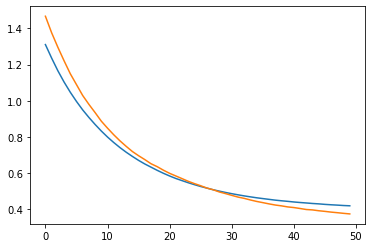

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [17]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

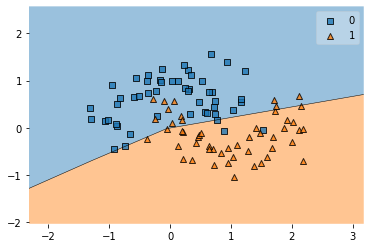

In [18]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

In [19]:
y_capf

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

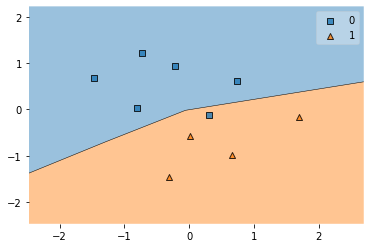

In [20]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

In [21]:
x_testf[[0,1]]

array([[-0.31505781, -1.46759332],
       [ 0.30392922, -0.12344178]])

In [22]:
y_test

96    1.0
49    0.0
57    0.0
92    0.0
89    1.0
91    0.0
65    1.0
73    1.0
66    0.0
94    0.0
Name: 2, dtype: float64

In [23]:
model1=Sequential()
model1.add(Dense(3,activation="relu",input_dim=2,kernel_initializer="he_uniform"))

model1.add(Dense(2,activation="relu",kernel_initializer="he_uniform"))


model1.add(Dense(1,activation="sigmoid"))

In [24]:
model1.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
history=model1.fit(x_trainf,y_train,batch_size=1,epochs=50,validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 1s 3ms/step - loss: 0.9656 - accuracy: 0.5417 - val_loss: 1.0340 - val_accuracy: 0.5556
Epoch 2/50
72/72 [==============================] - 0s 2ms/step - loss: 0.8865 - accuracy: 0.5833 - val_loss: 0.9375 - val_accuracy: 0.5556
Epoch 3/50
72/72 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.5833 - val_loss: 0.8614 - val_accuracy: 0.5556
Epoch 4/50
72/72 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.6111 - val_loss: 0.7948 - val_accuracy: 0.5556
Epoch 5/50
72/72 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.5972 - val_loss: 0.7384 - val_accuracy: 0.5556
Epoch 6/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5833 - val_loss: 0.6901 - val_accuracy: 0.5556
Epoch 7/50
72/72 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6111 - val_loss: 0.6475 - val_accuracy: 0.6111
Epoch 8/50
72/72 [==

In [26]:
y_cap1=model1.predict(x_testf)

1/1 [==============================] - 0s 50ms/step


In [27]:
y_capf=np.where(y_cap1>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.9

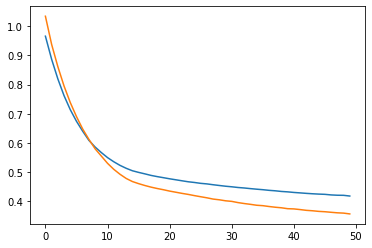

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

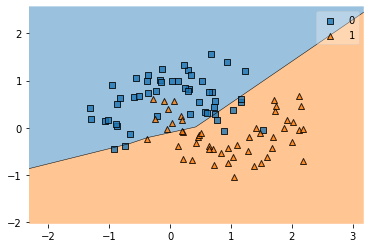

In [30]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model1)

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

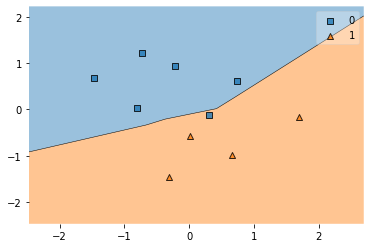

In [31]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model1)